In [1]:
import torch
from torch_geometric.datasets import Planetoid # Pytorch Geometric datasets
import torch_geometric.transforms as T # Pytorch Geometric transformations, in this case we are going to use the LargestConnectedComponents
from torch_geometric.utils import to_networkx # Convert PyG data object to NetworkX graph

# Load the Cora dataset
# root: root directory where the dataset should be saved
# name: name of the dataset
# transform: a function/transform that takes in an optional argument and returns a transformed version
dataset = Planetoid(root='data/Cora', name='Cora', transform=T.LargestConnectedComponents())
# Get the first element of the dataset, since it is a list of PyG data objects
data = dataset[0]
# Convert the PyG data object to a NetworkX graph
G = to_networkx(data, to_undirected=True)
# Get the labels of the nodes
labels = data.y.numpy()
print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Number of edges: {G.number_of_edges()}')
print(f'Number of classes: {len(set(labels))}')

Processing...
Done!


Number of nodes: 2485
Number of edges: 5069
Number of classes: 7


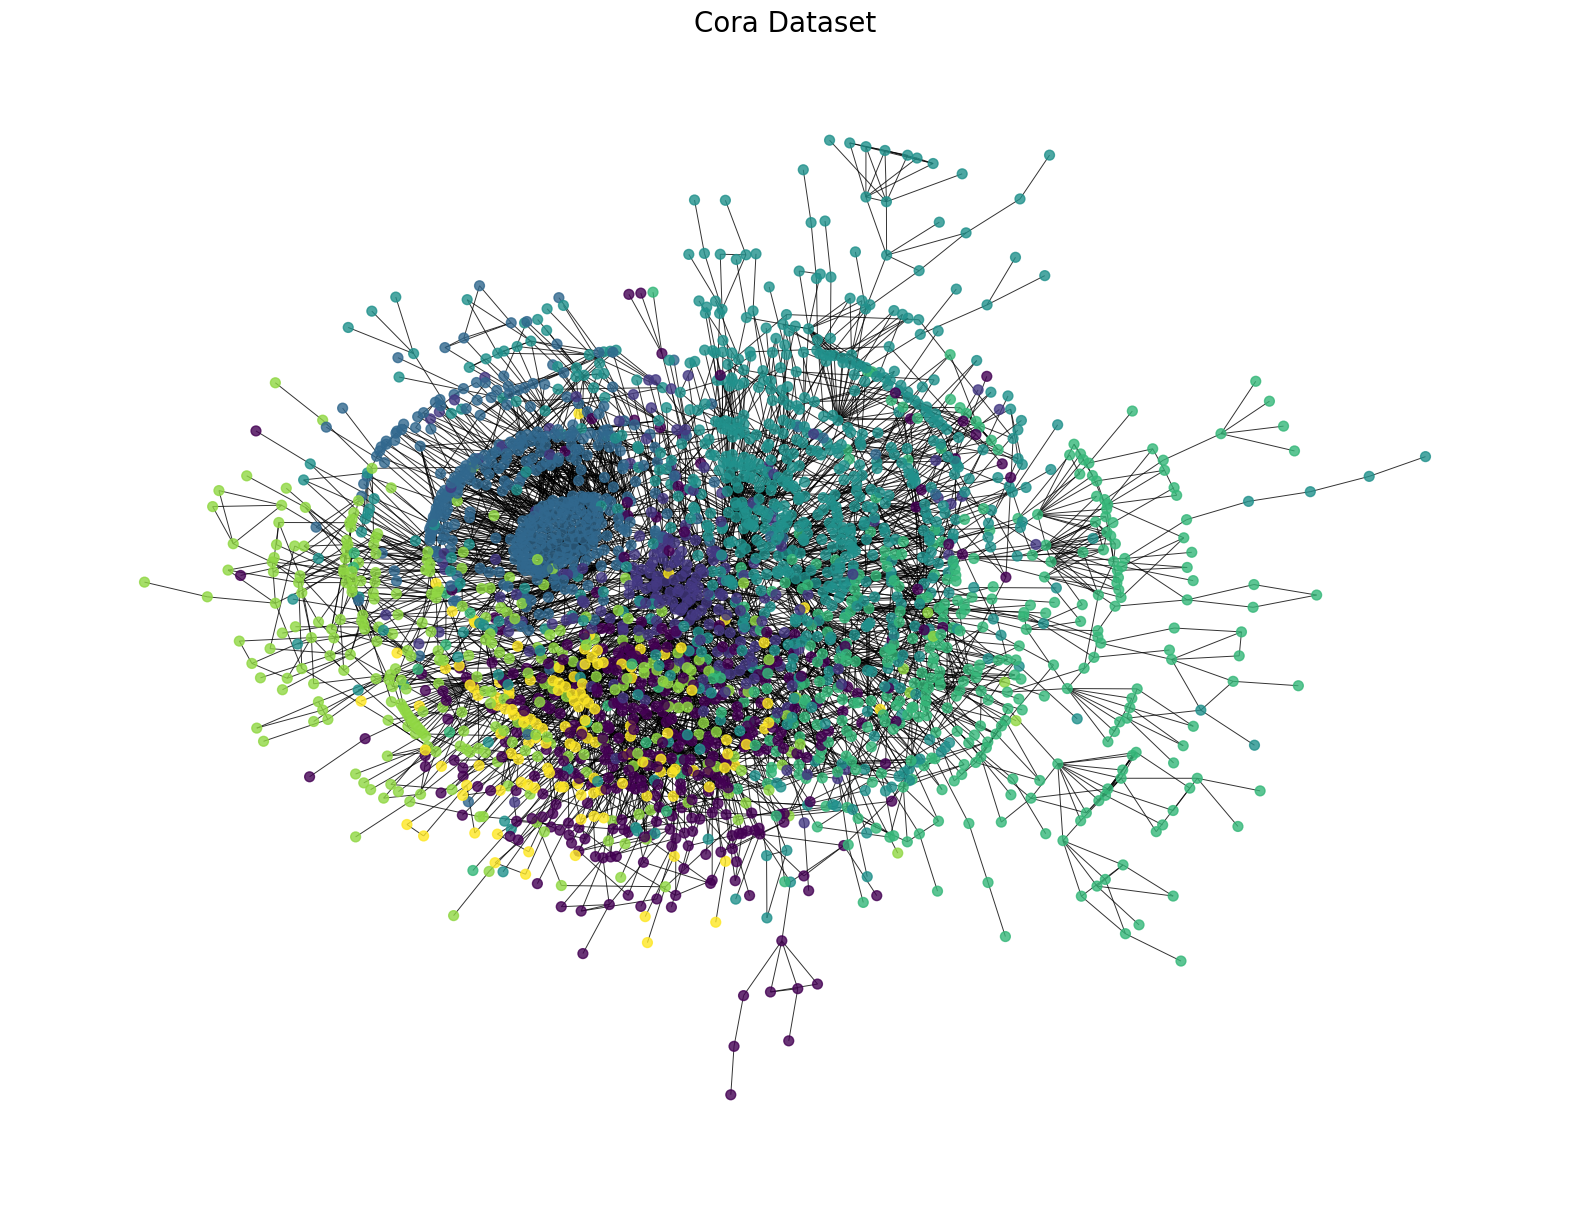

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
plt.figure(figsize=(20, 15))
plt.title('Cora Dataset', fontsize=20)
pos = nx.kamada_kawai_layout(G)
# Color is based on data.y
colors = data.y.numpy()
nx.draw(G, pos=pos, cmap=plt.cm.viridis, node_color=colors, node_size=50, edge_color='black', width=0.7, with_labels=False, node_shape='o', alpha=0.8)
plt.show()

In [4]:
# Now let's try to classify the nodes using the embeddings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Split the data into training and test sets

# Get the embeddings
embeddings = 

X = embeddings
y = data.y.numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Train a logistic regression classifier
clf = LogisticRegression(max_iter=1000, random_state=0)
clf.fit(X_train, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


FileNotFoundError: [Errno 2] No such file or directory: 'data/Cora/embeddings.pt'